In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [53]:
filename_in_dir = []

for root,dirs,files in os.walk('swing/back_cut'):
    for fname in files:
        full_fname = os.path.join(root,fname)
        filename_in_dir.append(full_fname)

print(len(filename_in_dir))

1429


100%|██████████| 1429/1429 [00:06<00:00, 208.35it/s]


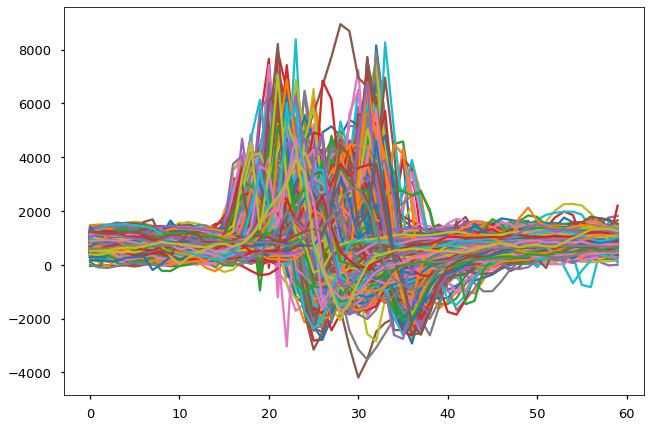

In [55]:
n = 0
plt.figure()
for file in tqdm(filename_in_dir):
    data = open(file,'r').read().split('\n')
    data.pop(0)
    index = data.pop(0)
    real_data = []
    for tmp in range(len(data)):
        if data[tmp] == '':
            continue
        real_data.append(data[tmp].split(','))
    df = pd.DataFrame(real_data)
    index_li = index.split(',')
    df.columns = index_li
    for y in index_li:
        df[y] = pd.to_numeric(df[y],downcast='float')
    
    x = np.array(df['AX'])
    y = [k for k in range(len(df))]
    plt.plot(y,x)

plt.show()

100%|██████████| 1429/1429 [00:05<00:00, 277.45it/s]


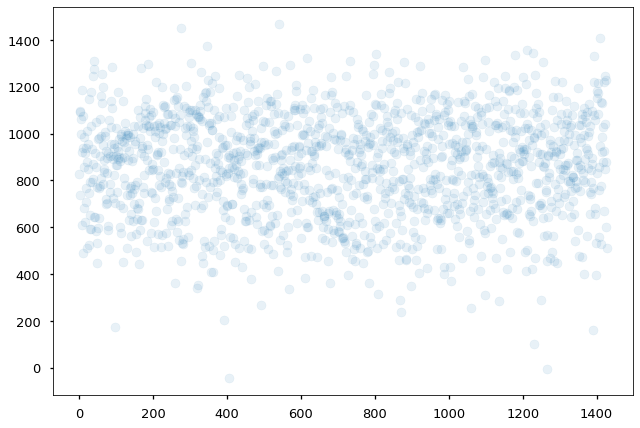

In [58]:
n = 0

s_li = []
for file in tqdm(filename_in_dir):
    data = open(file,'r').read().split('\n')
    data.pop(0)
    index = data.pop(0)
    real_data = []
    for tmp in range(len(data)):
        if data[tmp] == '':
            continue
        real_data.append(data[tmp].split(','))
    df = pd.DataFrame(real_data)
    index_li = index.split(',')
    df.columns = index_li
    for y in index_li:
        df[y] = pd.to_numeric(df[y],downcast='float')
    
    s_li.append(df['AX'][0])
    
ind = [x for x in range(len(s_li))]
y = s_li
plt.figure()
plt.scatter(ind,y,alpha=0.1)
plt.show()


In [60]:
np.mean(s_li)

858.9979

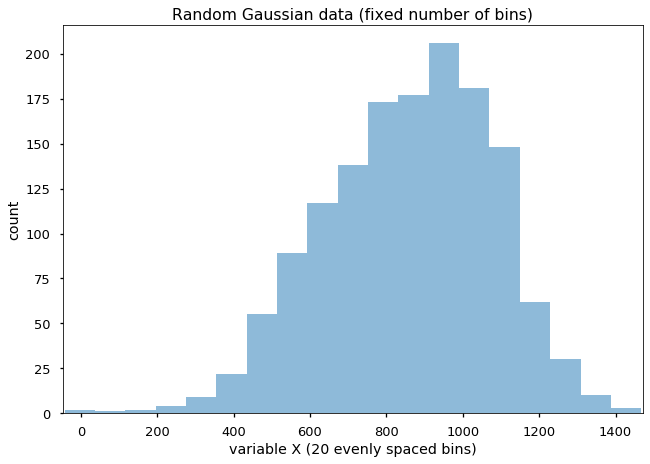

In [61]:
import math

data = s_li
bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   20) # fixed number of bins

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed number of bins)')
plt.xlabel('variable X (20 evenly spaced bins)')
plt.ylabel('count')

plt.show()


In [83]:
total_dir = ['swing/back_cut','swing/back_drive','swing/back_short','swing/back_smash','swing/fo_cut','swing/fo_drive','swing/fo_short','swing/fo_smash']
total_axis = ['AX','AY','AZ']

for dir_name in total_dir:
    for tar_axis in total_axis:
        filename_in_dir = []

        for root,dirs,files in os.walk(dir_name):
            for fname in files:
                full_fname = os.path.join(root,fname)
                filename_in_dir.append(full_fname)
        tmp_axis_analysis = []
        for file in filename_in_dir:
            data = open(file,'r').read().split('\n')
            data.pop(0)
            index = data.pop(0)
            real_data = []
            for tmp in range(len(data)):
                if data[tmp] == '':
                    continue
                real_data.append(data[tmp].split(','))
            df = pd.DataFrame(real_data)
            index_li = index.split(',')
            df.columns = index_li
            for y in index_li:
                df[y] = pd.to_numeric(df[y],downcast='float')
            
            med = np.mean(list(df[tar_axis]))
            tmp_axis_analysis.append(med)
        print('dir:',dir_name,'tar_axis:',tar_axis,'low:',np.percentile(tmp_axis_analysis,25),'high:',np.percentile(tmp_axis_analysis,75))
    print('\n\n')

dir: swing/back_cut tar_axis: AX low: 721.3666666666667 high: 974.6166666666667
dir: swing/back_cut tar_axis: AY low: -358.1666666666667 high: -170.45
dir: swing/back_cut tar_axis: AZ low: -704.6 high: -452.48333333333335



dir: swing/back_drive tar_axis: AX low: 297.85 high: 552.8666666666667
dir: swing/back_drive tar_axis: AY low: -828.1333333333333 high: -394.45
dir: swing/back_drive tar_axis: AZ low: 904.5 high: 1159.6666666666667



dir: swing/back_short tar_axis: AX low: 673.5333333333333 high: 949.0458333333333
dir: swing/back_short tar_axis: AY low: -97.73333333333333 high: 101.22916666666666
dir: swing/back_short tar_axis: AZ low: 500.66249999999997 high: 802.7916666666666



dir: swing/back_smash tar_axis: AX low: 635.2833333333333 high: 941.2333333333333
dir: swing/back_smash tar_axis: AY low: -790.5 high: -431.9166666666667
dir: swing/back_smash tar_axis: AZ low: 930.4 high: 1157.6



dir: swing/fo_cut tar_axis: AX low: 430.28333333333336 high: 657.3666666666667
dir: swing